# **Image Captioning**

<img src="https://repository-images.githubusercontent.com/83958320/8f162500-8ace-11e9-94ee-0b86d27bbc5e" alt="1" border="0">

This notebook contains the required task for the **first assignment** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.

# **Task Description**

Your task is to train your **own custom image captioning model** and compare its performance with an existing **pre-trained** model. You will work with the `Flickr8k` [dataset](https://www.kaggle.com/datasets/adityajn105/flickr8k), ensuring it is properly split into **training, validation,** and **test** sets. The model should follow an **Encoder-Decoder + Attention** structure, where the encoder can use a **pre-trained backbone** such as *ResNet*, but it must be **fine-tuned**. An **attention layer** is required to visualize what the network has learned. After training, you will **evaluate and compare** the performance of your model against a **pre-trained** one, analyzing the **generated captions** and the **attention mechanisms**.

The `Flickr8k` dataset consists of **8000 images**, each paired with **5 captions**, resulting in a total of **40,000 captions**. It is your **design choice** how you implement the **dataset and batching process**. A common approach is to treat each caption as a separate data point, yielding **40,000 datapoints** in total.

The **tokenization process** is also up to you. Since the dataset contains a vast vocabulary, it may include words that appear only once. To improve model efficiency, it is **good practice to limit the vocabulary size**.

During **validation and testing**, every image has **5 reference captions**. To ensure a robust `BLEU` **score calculation**, it is recommended to compute `BLEU` scores using **all 5 matching captions** as reference captions for each image.

# **Expectations**

- Your model is **not expected to achieve state-of-the-art performance**, but it should perform **better than random guessing**. The **loss should decrease** throughout training, and the model’s performance should be monitored to prevent overfitting or underfitting.

- You will work with the `Flickr8k` dataset, which should be split into **train, validation, and test** sets. The `training` set is used to train the image captioning model, the `validation` set helps fine-tune hyperparameters and monitor performance, and the `test` set is used for final evaluation.

- To assess model performance, include **visualizations of loss values** and **evaluation metrics** for the dataset splits.

- You are free to choose any **pre-trained model** (`blip`, `vit-gpt2-flickr8k`, etc.) for model comparison at the end.

# **Requirements**

- Data Preparation and Visualization:
  - Ensure the **Flickr8k dataset** is correctly split into **train, validation, and test sets**.
  - Display **sample images with their original captions**.
  - Visualize **tokenized captions** to ensure proper preprocessing.

- Model Training and Performance Monitoring:
  - Train an **Encoder-Decoder + Attention** model using the training set.
  - Track **training and validation loss** using visualizations (e.g., `Matplotlib`, `Seaborn`).
  - Monitor **BLEU-1, BLEU-2, BLEU-3, and BLEU-4 scores** for a greedy decoder throughout training.

- Implement **techniques to avoid overfitting**, such as:
    - **Early stopping** to halt training when validation loss stops improving.
    - **Regularization** (e.g., dropout, weight decay) to improve generalization.
    - **Experimenting with different loss functions** to find the most effective approach.
    - **Saving the best-performing model** during training for later evaluation.

- Model Comparison:
  - Evaluate and compare your **custom-trained model** with a **pre-trained model** on the same batch of test images.
  - **Visualize generated captions** and compare them to ground-truth captions.
  - Compute **BLEU scores** using all five reference captions for a given image.
  - Analyze and explain the **strengths and weaknesses** of both models based on performance differences.

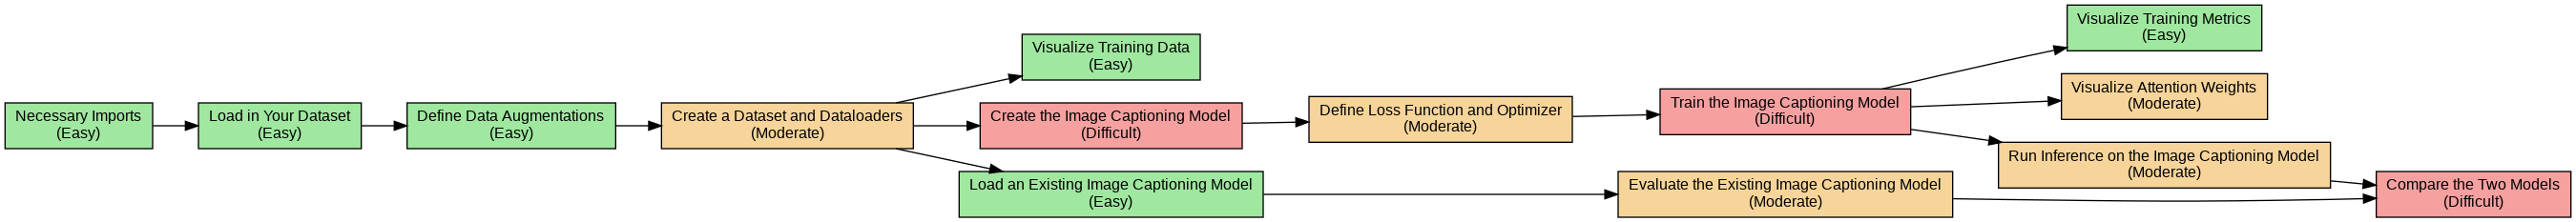

In [ ]:
# @title Image Captioning Tasks
# %%capture flowchart_output
# HIDDEN CELL
from graphviz import Digraph
from IPython.display import Image as IMG

def create_flowchart(output_filename='flowchart'):
    dot = Digraph(name='Simplified Object Detection', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')

    dot.node('LoadData', 'Load in Your Dataset\n(Easy)', fillcolor='#A0E7A0')

    dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')

    dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')
    dot.node('CreateModel', 'Create the Image Captioning Model\n(Difficult)', fillcolor='#F6A0A0')

    dot.node('Hyperparameters', 'Define Loss Function and Optimizer\n(Moderate)', fillcolor='#F6D49A')

    dot.node('TrainModel', 'Train the Image Captioning Model\n(Difficult)', fillcolor='#F6A0A0')

    dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')
    dot.node('VisualizeAtt', 'Visualize Attention Weights\n(Moderate)', fillcolor='#F6D49A')
    dot.node('RunInference', 'Run Inference on the Image Captioning Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('LoadModel', 'Load an Existing Image Captioning Model\n(Easy)', fillcolor='#A0E7A0')

    dot.node('EvaluateModel', 'Evaluate the Existing Image Captioning Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('Comparison', 'Compare the Two Models\n(Difficult)', fillcolor='#F6A0A0')

    # Edges
    dot.edge('Imports', 'LoadData')

    dot.edge('LoadData', 'AugmentData')

    dot.edge('AugmentData', 'DatasetDataloader')

    dot.edge('DatasetDataloader', 'CreateModel')
    dot.edge('DatasetDataloader', 'VisualizeSample')

    dot.edge('CreateModel', 'Hyperparameters')
    dot.edge('Hyperparameters', 'TrainModel')
    dot.edge('TrainModel', 'VisualizeTrain')
    dot.edge('TrainModel', 'VisualizeAtt')
    dot.edge('TrainModel', 'RunInference')

    dot.edge('DatasetDataloader', 'LoadModel')
    dot.edge('LoadModel', 'EvaluateModel')
    dot.edge('RunInference', 'Comparison')
    dot.edge('EvaluateModel', 'Comparison')

    dot.render(output_filename, view=False)

create_flowchart('assignment1_flowchart')
IMG('assignment1_flowchart.png')

Each section of the Notebook will guide you through the task:

- `necessary imports`
- `data loading process`
- `defining data augmentations`
- `creating a dataset and dataloaders`
- `visualizing the training data`
- `creating a CNN model`
- `creating a FCN model`
- `defining a loss function and an optimizer`
- `creating a training and validation loop`
- `testing the models`
- `comparing results`
- `visualizing weights and feature maps`

## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [1]:
# System & Utilities
import os  # file operations
import math  # positional encoding or math ops
import random  # random sampling
import re  # regex for text processing
from collections import Counter  # word frequency counting
import time # time related operations


# Core Libraries
import numpy as np  # numerical ops
import matplotlib.pyplot as plt  # plotting

# PyTorch
import torch  # base PyTorch
import torch.nn as nn  # neural network layers
import torch.nn.functional as F  # functional layers
import torch.optim as optim  # optimizers
from torch.utils.data import Dataset, DataLoader, random_split, Subset  # data handling
from torch.nn.utils.rnn import pad_sequence  # for padded batching

# TorchVision
import torchvision  # pretrained vision models
from torchvision import transforms  # image transformations

# Image Handling
from PIL import Image  # image file loading

# Progress Bar
from tqdm import tqdm  # loop progress bars

# NLP
import nltk  # NLP tools
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction  # BLEU score for evaluation

# Transformers
from transformers import BlipProcessor, BlipForConditionalGeneration  # BLIP captioning model

# Colab-Specific
from google.colab import drive  # mount Google Drive in Colab

# Device
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")  # choose device
device

device(type='cuda', index=0)

In [2]:
drive.mount('/content/drive')  # mount Google Drive

Mounted at /content/drive


## **1. Data Loading Process**

For this assignment you will be using the [Flickr8k](https://www.kaggle.com/datasets/adityajn105/flickr8k) dataset, which contains **captions/descriptions** of different images.

<img src="https://user-images.githubusercontent.com/38347541/56469847-9faa0780-645c-11e9-822a-11a15bb56f5b.png" alt="1" border="0">

The best way to download this dataset is through `Kaggle`. First **create a token**, download it and upload it here. Follow [these](https://www.kaggle.com/discussions/general/74235) steps.

In [ ]:
# Install Kaggle API client
!pip install kaggle --quiet

# Create the .kaggle directory for API credentials
!mkdir -p ~/.kaggle

# Copy kaggle.json from Google Drive to .kaggle
!cp /content/drive/MyDrive/dnd-assignment/kaggle.json ~/.kaggle/kaggle.json

# Set secure permissions for the Kaggle API key
!chmod 600 ~/.kaggle/kaggle.json

# Define dataset name
dataset_name = "adityajn105/flickr8k"

# Download Flickr8k dataset to your Drive
!kaggle datasets download -d {dataset_name} -p /content/drive/MyDrive/dnd-assignment/

# Unzip the dataset into a specific folder
!unzip -n /content/drive/MyDrive/dnd-assignment/flickr8k.zip -d /content/drive/MyDrive/dnd-assignment/flickr8k_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2844846111_8c1cbfc75d.jpg  
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2844963839_ff09cdb81f.jpg  
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2845691057_d4ab89d889.jpg  
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2845845721_d0bc113ff7.jpg  
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2846037553_1a1de50709.jpg  
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2846785268_904c5fcf9f.jpg  
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2846843520_b0e6211478.jpg  
  inflating: /content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/2847514745_9a35493023.jpg  
  inflating: /content/drive/MyDrive/dnd-assignmen

## **2. Defining Augmentations**

When applying **augmentations** to the `Flickr8k` dataset, it is important to note that these transformations should be applied **only to the images** and not to the captions.

Ensure that your **data augmentation pipeline** includes:
- A **normalization step** to scale pixel values appropriately.
- A **tensor conversion step** to transform images into tensors for model compatibility.
- Additional **augmentations of your choice**, such as random cropping, flipping, or color jittering, to enhance model generalization.

```python
train_transforms = transforms.Compose([
            # Add Augmentations
])

test_transforms = transforms.Compose([
            # Add Augmentations
])
```

In [3]:
# Image dimensions and normalization values (ImageNet stats)
h, w = 224, 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Training transformations with augmentations
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop((h, w), scale=(0.8, 1.0)),  # random crop and resize
    transforms.RandomHorizontalFlip(),  # random horizontal flip
    transforms.RandomRotation(15),  # slight random rotation
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize(mean=mean, std=std),  # normalize with ImageNet stats
])

# Testing/validation transformations (no augmentation)
test_transforms = transforms.Compose([
    transforms.Resize((h, w)),  # resize to fixed size
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize(mean=mean, std=std),  # normalize with ImageNet stats
])

## **3. Creating Datasets and Dataloaders**

To load the **Flickr8k** dataset, you need to create a **custom PyTorch** `Dataset` class that returns **images and their corresponding captions**. The captions should be **tokenized** before being returned.

Make sure to include special tokens in your tokenized captions:
- `sos` (Start of Sentence)
- `eos` (End of Sentence)
- `unk` (Unknown Token) for words outside the vocabulary.

It is recommended to build a **Vocabulary class** to store all the words in your dataset, as your model can only generate words that exist in this vocabulary. However, saving every word is unnecessary. A **common practice** is to include only words that appear **at least 5 times** across the entire dataset to reduce noise and improve model efficiency.

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

> **Note**: Remember that, a batch has **different examples**, and each example (caption) might have **different sizes**. Therefore, consider padding techniques for the captions.

```python
class FlickrDataset(Dataset):
    def __init__(self,):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __getitem__(self, idx):
        raise NotImplementedError
```

In [4]:
# Vocabulary class for tokenizing text and building vocabulary
class Vocabulary:
    def __init__(self, freq_threshold=5):
        self.freq_threshold = freq_threshold  # Minimum frequency to keep a word in the vocabulary
        self.itos = {0: "<pad>", 1: "<sos>", 2: "<eos>", 3: "<unk>"}  # Default tokens (pad, start of sentence, end of sentence, unknown)
        self.stoi = {v: k for k, v in self.itos.items()}  # Reverse mapping from word to index
        self.word_freq = Counter()  # Counter to keep track of word frequencies

    def __len__(self):
        return len(self.itos)  # Returns size of vocabulary

    def tokenizer(self, text):
        """
        Tokenizes the input text:
        - Converts to lowercase
        - Splits by word characters (letters, digits, underscores)
        """
        text = text.lower()
        tokens = re.findall(r'\w+', text)  # Regex to split text into words and remove punctuation
        return tokens

    def build_vocab(self, sentence_list):
        """
        Builds vocabulary from a list of sentences:
        - Tokenizes each sentence
        - Updates word frequency count
        - Adds words to vocab if their frequency exceeds threshold
        """
        for sentence in sentence_list:
            tokens = self.tokenizer(sentence)
            self.word_freq.update(tokens)  # Update frequency of words

        # Add words to vocab if frequency is above threshold
        for word, freq in self.word_freq.items():
            if freq >= self.freq_threshold and word not in self.stoi:
                idx = len(self.itos)  # New index for new word
                self.stoi[word] = idx  # Add word to stoi dictionary
                self.itos[idx] = word  # Add word to itos dictionary

    def numericalize(self, text):
        """
        Converts a text sentence to a list of token indices.
        - Uses stoi dictionary to map words to indices
        - Replaces unknown words with <unk> index
        """
        tokenized = self.tokenizer(text)  # Tokenize the sentence
        return [self.stoi.get(word, self.stoi["<unk>"]) for word in tokenized]  # Return indices


# Dataset class for loading images and captions
class FlickrDataset(Dataset):
    def __init__(self, image_dir, captions_file, vocab, transform=None):
        self.image_dir = image_dir  # Path to images
        self.transform = transform  # Transformations to apply to images
        self.vocab = vocab  # Vocabulary object for tokenizing captions

        # Read captions file
        with open(captions_file, 'r') as f:
            lines = f.readlines()

        lines = lines[1:]  # Skip header if exists

        self.image_paths = []  # List of image file names
        self.captions = []  # List of captions

        # Parse each line in the caption file
        for line in lines:
            line = line.strip()
            if '\t' in line:
                img, caption = line.split('\t')  # For tab-separated files
            else:
                img, caption = line.split(',', 1)  # For comma-separated files

            img = img.split('#')[0]  # Remove index from image name
            self.image_paths.append(img)  # Store image path
            self.captions.append(caption)  # Store caption

        # Build vocabulary from all captions
        self.vocab.build_vocab(self.captions)

    def __len__(self):
        return len(self.captions)  # Return the number of caption-image pairs

    def __getitem__(self, idx):
        """
        Retrieves the image and its corresponding caption at the given index:
        - Loads image
        - Applies transformations (if any)
        - Numericalizes the caption
        """
        caption = self.captions[idx]
        img_name = self.image_paths[idx]
        img_path = os.path.join(self.image_dir, img_name)

        image = Image.open(img_path).convert("RGB")  # Open image and convert to RGB
        if self.transform:
            image = self.transform(image)  # Apply transformations if specified

        # Add <sos> and <eos> tokens to the caption and numericalize it
        numericalized = [self.vocab.stoi["<sos>"]] + self.vocab.numericalize(caption) + [self.vocab.stoi["<eos>"]]
        return image, torch.tensor(numericalized)  # Return image and its corresponding numericalized caption


# Custom collate function for padding sequences in a batch
class MyCollate:
    def __init__(self, pad_idx, transform=None):
        self.pad_idx = pad_idx  # Padding index for sequences
        self.transform = transform  # Optional transformations to apply to images

    def __call__(self, batch):
        """
        Collates a batch of images and captions:
        - Applies the transformations (if not already done)
        - Pads the captions to the same length
        """
        images = [item[0] for item in batch]  # Extract images from batch
        captions = [item[1] for item in batch]  # Extract captions from batch

        # Apply the transform if specified
        if self.transform:
            images = [self.transform(image) for image in images]

        # Pad the captions to the same length
        captions = pad_sequence(captions, batch_first=True, padding_value=self.pad_idx)

        return torch.stack(images), captions  # Stack images and return the batch


In [5]:
# Load the full dataset (Flickr8k dataset)
full_dataset = FlickrDataset(
    image_dir="/content/drive/MyDrive/dnd-assignment/flickr8k_data/Images",  # Path to the images
    captions_file="/content/drive/MyDrive/dnd-assignment/flickr8k_data/captions.txt",  # Path to the captions file
    vocab=Vocabulary(freq_threshold=5),  # Initialize vocabulary with a frequency threshold of 5
    transform=None  # We'll apply transformations later
)

# Step 1: Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(full_dataset))  # 80% for training
remaining = len(full_dataset) - train_size  # Remaining 20% for validation and testing
valid_size = int(0.5 * remaining)  # Split remaining equally into validation and test (50% each)
test_size = remaining - valid_size  # Remaining for testing

# Perform the split using random_split (reproducible with the random seed)
train_dataset, valid_dataset, test_dataset = random_split(
    full_dataset, [train_size, valid_size, test_size],
    generator=torch.Generator().manual_seed(42)  # Set the random seed for reproducibility
)

# Step 2: (Optional) Retain only a percentage of the dataset for quick experiments
def retain_percentage(dataset, percentage):
    """
    Randomly retain a percentage of the dataset.
    For example, 15% of the dataset will be selected.
    """
    indices = list(range(len(dataset)))  # List of all indices
    random.shuffle(indices)  # Shuffle indices randomly
    retain_size = int(percentage * len(dataset) / 100)  # Calculate the number of samples to retain
    selected_indices = indices[:retain_size]  # Select the top 'retain_size' indices
    return Subset(dataset, selected_indices)  # Return the subset with selected indices

percentage = 15  # For example, keep 15% of the dataset for quick experimentation
train_dataset = retain_percentage(train_dataset, percentage)
valid_dataset = retain_percentage(valid_dataset, percentage)
test_dataset = retain_percentage(test_dataset, percentage)

# Step 3: Apply transformations to the datasets
# Define the transformations for training and testing datasets
train_dataset.dataset.transform = train_transforms  # Apply train transformations
valid_dataset.dataset.transform = test_transforms  # Apply test transformations
test_dataset.dataset.transform = test_transforms  # Apply test transformations

# Step 4: Set up DataLoaders for batching and shuffling
pad_idx = full_dataset.vocab.stoi["<pad>"]  # Get the padding index for the vocabulary

# Initialize DataLoader for training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx, transform=train_transforms))
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx, transform=test_transforms))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=MyCollate(pad_idx=pad_idx, transform=test_transforms))

# Step 5: Check dataset sizes after splitting and retaining percentage
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validating dataset size: {len(valid_dataset)}")
print(f"Testing dataset size: {len(test_dataset)}")

Training dataset size: 4854
Validating dataset size: 606
Testing dataset size: 606


## **4.1 Visualizing Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input-target** pairs using `Matplotlib` or `Seaborn`. Ensure that at least **8 pairs** are displayed for a clear representation.

Make sure to **visualize the original and the tokenized caption** as well!

```python
def visualize_batch():
  raise NotImplementedError
```

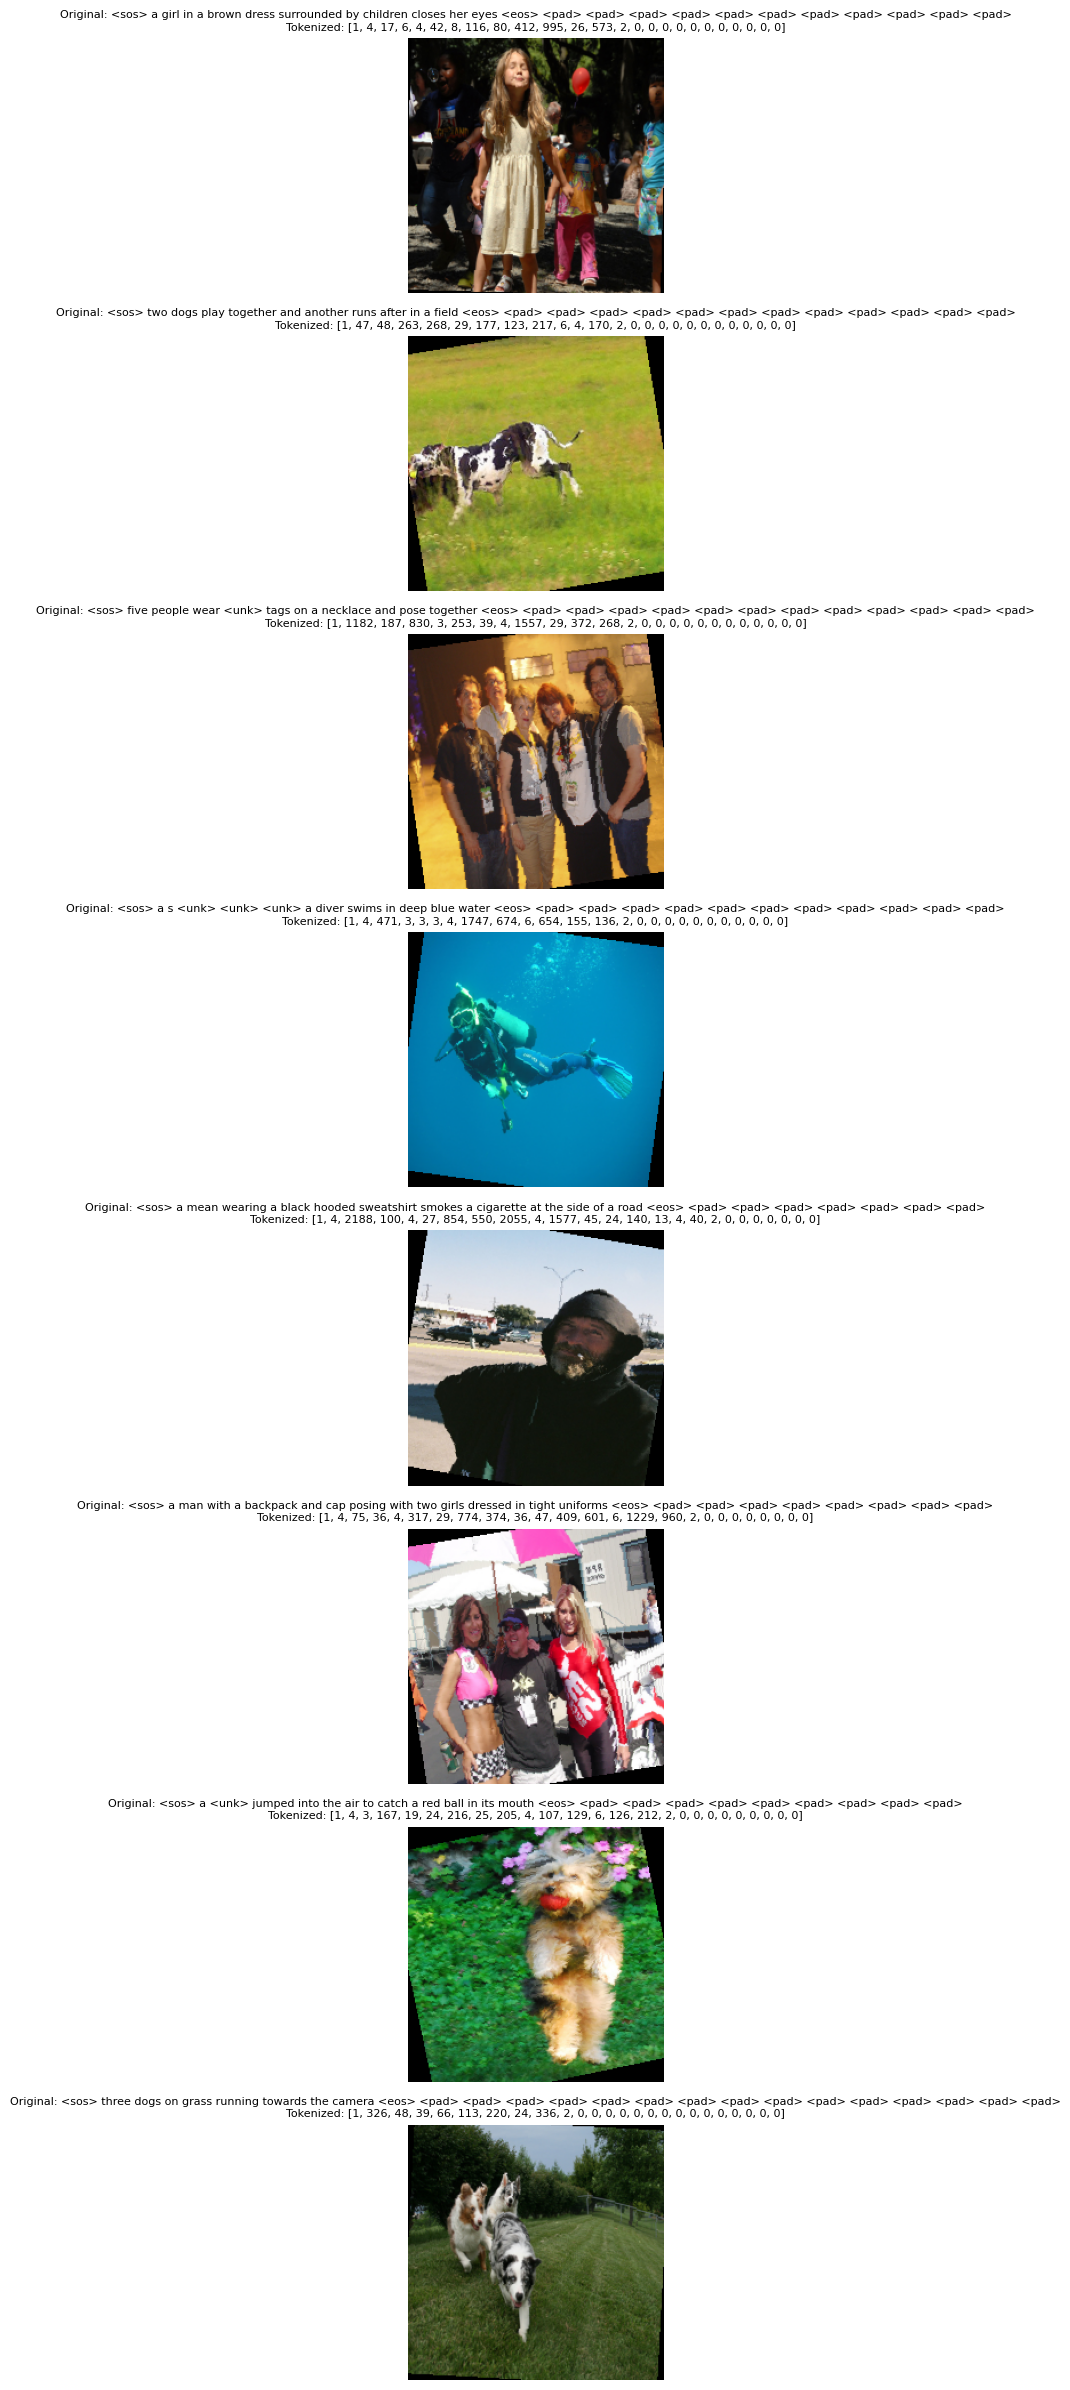

In [ ]:
import matplotlib.pyplot as plt
import torch

def visualize_batch(num_images=8):
    """
    Visualize a batch of images along with their corresponding captions.

    Args:
        num_images (int): Number of images to display from the batch.
    """
    # Get the next batch of images and captions from the train_loader
    batch_images, batch_captions = next(iter(train_loader))

    # Set up a grid of subplots to display the images
    fig, axes = plt.subplots(num_images, 1, figsize=(8, 24))

    for i in range(num_images):
        ax = axes[i]

        # Get the image from the batch and rearrange dimensions for plotting
        image = batch_images[i]
        image = image.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)

        # Undo the normalization applied earlier to the images
        image = image * torch.tensor(std).view(1, 1, 3) + torch.tensor(mean).view(1, 1, 3)
        image = torch.clamp(image, 0, 1)  # Clamp the values between 0 and 1 for visualization

        # Display the image
        ax.imshow(image)
        ax.axis('off')  # Hide axis for better visualization

        # Decode the caption for the current image
        caption = batch_captions[i]
        decoded_caption = ' '.join([full_dataset.vocab.itos.get(token.item(), "<unk>") for token in caption])

        # Tokenized caption (list of numerical values representing the words)
        tokenized_caption = [token.item() for token in caption]

        # Set the title with both the decoded caption and the tokenized version
        ax.set_title(f"Original: {decoded_caption}\nTokenized: {tokenized_caption}", fontsize=8)

    plt.tight_layout()  # Ensure images and captions don't overlap
    plt.show()  # Display the plot

# Call the function to visualize a batch of images and their captions
visualize_batch()

## **4.2 Creating the Image Captioning Model**

For this assignment, **you are required to create your own custom image captioning model** and **compare its performance** with an existing pre-trained model.

---

### **Encoder-Attention-Decoder Architecture**

Your model should follow an **Encoder-Attention-Decoder** structure with the following components:

- The **Encoder** processes images to extract meaningful features. You can either design a **custom convolutional architecture** or use a **pre-trained model** like *ResNet*, but **fine-tuning is required** to adapt the features to the captioning task.
- The **Attention Layer** acts as an interface between the encoder and decoder. It leverages the extracted image features to compute **attention scores**, helping the decoder focus on relevant parts of the image during caption generation. For simplicity, use **Linear layers** to implement the attention mechanism.
- The **Decoder** is a sequence-based model (e.g., *LSTM*) that processes the image features and generates captions sequentially.

---

#### **Extra Credit Opportunity**
- Additional points will be awarded for implementing either a **Vision Transformer (ViT) encoder** or a **Transformer-based decoder** instead of an LSTM.

Here is an example of something similar to what we want to create:
<img src="https://drive.google.com/thumbnail?id=1wdddaLit7iEyCcVy5bS505NiYzL6c-4x&sz=w1000">

```python
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        return NotImplementedError

    def forward(self, images):
        return NotImplementedError
```

```python
class Attention(nn.Module):
    def __init__(self, encoder_dim,decoder_dim,attention_dim):
        super(Attention, self).__init__()
        return NotImplementedError

    def forward(self, features, hidden_state):
        return NotImplementedError
```

```python
class Decoder(nn.Module):
    def __init__(self, embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim):
        return NotImplementedError

    def forward(self, features, captions):
        return NotImplementedError
```
```python
class EncoderDecoder(nn.Module):
    def __init__(self,embed_size, vocab_size, attention_dim, encoder_dim,decoder_dim):
        return NotImplementedError

    def forward(self, images, captions):
        return NotImplementedError
```

In [7]:
class Encoder(nn.Module):
    """
    Encoder class that processes images using a pre-trained ResNet50 model, removes
    the last few layers, and applies adaptive pooling to generate a fixed-size feature map.
    """
    def __init__(self, encoded_image_size=14):
        super(Encoder, self).__init__()

        # Load ResNet50 pre-trained on ImageNet and remove the last two layers (FC and pooling)
        resnet = torchvision.models.resnet50(weights='IMAGENET1K_V1')
        modules = list(resnet.children())[:-2]  # Remove the linear and pool layers
        self.resnet = nn.Sequential(*modules)

        # Apply adaptive average pooling to get a fixed-sized feature map
        self.adaptive_pool = nn.AdaptiveAvgPool2d((encoded_image_size, encoded_image_size))

        # Fine-tune the ResNet layers (by default, set to False)
        self.fine_tune()

    def forward(self, images):
        """
        Forward pass through the encoder:
        1. Extract features using ResNet
        2. Apply adaptive pooling to resize features
        3. Flatten the feature map and permute for further processing
        """
        features = self.resnet(images)  # (batch_size, 2048, feature_size, feature_size)
        features = self.adaptive_pool(features)  # (batch_size, 2048, encoded_image_size, encoded_image_size)
        features = features.permute(0, 2, 3, 1)  # (batch_size, encoded_image_size, encoded_image_size, 2048)
        features = features.view(features.size(0), -1, features.size(-1))  # (batch_size, num_pixels, 2048)
        return features

    def fine_tune(self, fine_tune=True):
        """
        Optionally fine-tune layers of the ResNet model.
        By default, all layers are frozen except the last few.
        """
        # Freeze all layers
        for p in self.resnet.parameters():
            p.requires_grad = False

        # Unfreeze layers from a specific point onwards (default is from block 5)
        for c in list(self.resnet.children())[5:]:
            for p in c.parameters():
                p.requires_grad = fine_tune


class Attention(nn.Module):
    """
    Attention mechanism to compute a weighted sum of encoder features based on the decoder's hidden state.
    """
    def __init__(self, encoder_dim, decoder_dim, attention_dim):
        super(Attention, self).__init__()

        # Layers to project encoder and decoder states into attention space
        self.encoder_att = nn.Linear(encoder_dim, attention_dim)
        self.decoder_att = nn.Linear(decoder_dim, attention_dim)
        self.full_att = nn.Linear(attention_dim, 1)

        # Non-linearity and softmax
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, encoder_out, decoder_hidden):
        """
        Forward pass to compute attention:
        1. Project encoder and decoder states
        2. Compute attention weights (alpha) for each encoder feature
        3. Apply attention and compute weighted sum
        """
        att1 = self.encoder_att(encoder_out)  # (batch_size, num_pixels, attention_dim)
        att2 = self.decoder_att(decoder_hidden)  # (batch_size, attention_dim)
        att = self.full_att(self.relu(att1 + att2.unsqueeze(1))).squeeze(2)  # (batch_size, num_pixels)
        alpha = self.softmax(att)  # (batch_size, num_pixels)

        # Compute weighted sum of encoder features based on attention weights
        attention_weighted_encoding = (encoder_out * alpha.unsqueeze(2)).sum(dim=1)  # (batch_size, encoder_dim)
        return attention_weighted_encoding, alpha


class PositionalEncoding(nn.Module):
    """
    Positional Encoding class to encode position information in sequences
    (e.g., for the transformer decoder).
    """
    def __init__(self, embed_size, max_len=5000):
        super(PositionalEncoding, self).__init__()

        # Create a matrix to hold the positional encoding for each position
        pe = torch.zeros(max_len, embed_size)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * (-math.log(10000.0) / embed_size))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # Add batch dimension
        self.register_buffer('pe', pe)  # Register it as a buffer (non-trainable)

    def forward(self, x):
        """
        Add positional encodings to input tensor x.
        """
        x = x + self.pe[:, :x.size(1)]
        return x


class Decoder(nn.Module):
    """
    Decoder class that generates captions from image features using the transformer decoder and attention mechanism.
    """
    def __init__(self, embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim, num_layers=3, nhead=8):
        super(Decoder, self).__init__()

        # Word embeddings
        self.embedding = nn.Embedding(vocab_size, embed_size)

        # Positional encoding to add sequential information
        self.pos_encoder = PositionalEncoding(embed_size)

        # Projection from encoder output space to embedding space
        self.encoder_to_embed = nn.Linear(encoder_dim, embed_size)

        # Transformer decoder
        decoder_layer = nn.TransformerDecoderLayer(d_model=embed_size, nhead=nhead)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)

        # Fully connected layer to project decoder output to vocab size for classification
        self.fc = nn.Linear(embed_size, vocab_size)
        self.dropout = nn.Dropout(0.1)

        # Attention mechanism
        self.attention = Attention(encoder_dim, embed_size, attention_dim)

    def forward(self, encoder_out, captions):
        """
        Forward pass through the decoder:
        1. Embed captions and add positional encodings
        2. Project encoder features to embedding space
        3. Apply transformer decoder and attention mechanism
        """
        # Embedding and positional encoding
        embeddings = self.embedding(captions)  # (batch_size, seq_len, embed_size)
        embeddings = self.pos_encoder(embeddings)
        embeddings = embeddings.permute(1, 0, 2)  # (seq_len, batch_size, embed_size)

        # Project encoder output to embedding space
        encoder_out_proj = self.encoder_to_embed(encoder_out)  # (batch_size, num_pixels, embed_size)
        memory = encoder_out_proj.permute(1, 0, 2)  # (num_pixels, batch_size, embed_size)

        # Mask for transformer decoder (to prevent attending to future words)
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(embeddings.size(0)).to(embeddings.device)

        # Transformer decoder processing
        out = self.transformer_decoder(embeddings, memory, tgt_mask=tgt_mask)  # (seq_len, batch_size, embed_size)
        out = out.permute(1, 0, 2)  # (batch_size, seq_len, embed_size)

        # Apply attention for each decoded time step
        alphas = []
        attention_outputs = []
        for t in range(out.size(1)):
            att_out, alpha = self.attention(encoder_out, out[:, t, :])  # (batch_size, encoder_dim), (batch_size, num_pixels)
            attention_outputs.append(att_out.unsqueeze(1))  # (batch_size, 1, encoder_dim)
            alphas.append(alpha.unsqueeze(1))  # (batch_size, 1, num_pixels)

        attention_outputs = torch.cat(attention_outputs, dim=1)  # (batch_size, seq_len, encoder_dim)
        alphas = torch.cat(alphas, dim=1)  # (batch_size, seq_len, num_pixels)

        # Final classification (predict next word in the sequence)
        logits = self.fc(out)  # Project output to vocab size for each time step
        return logits, alphas


class EncoderDecoder(nn.Module):
    """
    Encoder-Decoder model that combines the encoder and decoder to generate captions.
    """
    def __init__(self, embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim):
        super(EncoderDecoder, self).__init__()

        # Initialize Encoder and Decoder
        self.encoder = Encoder()
        self.decoder = Decoder(embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim)

    def forward(self, images, captions):
        """
        Forward pass through the EncoderDecoder:
        1. Extract features from images using the encoder
        2. Generate captions using the decoder
        """
        encoder_out = self.encoder(images)
        outputs, alphas = self.decoder(encoder_out, captions)
        return outputs, alphas

## **5. Defining Loss Function and Optimizer**

**Loss Functions and their options:**

In an **image captioning task**, the model generates a sequence of words conditioned on an image. This involves both **sequence generation (language modeling)** and **image understanding**, making loss selection crucial for effective training. The primary loss function should optimize **word prediction** while ensuring **grammatical correctness and semantic coherence**.

Since our task involves **predicting discrete word tokens**, we typically use **sequence-based loss functions**, but we can also explore loss functions that account for **semantic meaning** and **alignment**.

---

### **a. Cross-Entropy Loss (Standard Sequence Prediction Loss)**  
The most common loss for text generation tasks is **Cross-Entropy Loss**, which measures the difference between the **predicted word probability distribution** and the **true word** in the sequence. It is computed as:

$$
\mathcal{L}_{CE} = -\sum_{t=1}^{T} y_t \log(\hat{y}_t)
$$

where:
- $T $ is the sequence length (number of words in the caption),
- $ y_t $ is the **ground truth word** (one-hot encoded),
- $ \hat{y}_t $ is the **predicted probability** of that word.

- **Pros:** Simple, well-established for text generation tasks, easy to implement.
- **Cons:** Treats each word prediction independently, ignoring sentence-level meaning, but useful during `teacher forcing`.

---

### **b. CIDER Loss (Reinforcement Learning-Based Caption Quality Loss)**  
Cross-Entropy loss focuses on **token-level** accuracy, but it does not capture **sentence-level fluency and meaning**. CIDER (Consensus-based Image Description Evaluation) helps optimize captions towards human-like descriptions.

$$
\mathcal{L}_{CIDEr} = 1 - CIDEr(\hat{Y}, Y)
$$

where $ CIDEr(\hat{Y}, Y) $ measures how similar the generated caption $ \hat{Y} $ is to multiple reference captions $ Y $.

- **Pros:** Optimizes for caption similarity to human references, improves fluency. Best suited for **fine-tuning after pretraining with Cross-Entropy** Loss.
- **Cons:** Harder to optimize, requires reinforcement learning.

---

### **c. BLEU Loss (Sentence-Level Evaluation Loss)**  
BLEU (Bilingual Evaluation Understudy) is a popular metric for text evaluation, comparing **n-grams** between the predicted and reference captions. Instead of optimizing individual word predictions, we can **directly optimize BLEU scores**:

$$
\mathcal{L}_{BLEU} = 1 - BLEU_n(\hat{Y}, Y)
$$

where $ BLEU_n(\hat{Y}, Y) $ calculates the **n-gram precision** between the generated caption $ \hat{Y} $ and the reference set $ Y $.

- **Pros:** Encourages **coherent phrase generation**, rather than just single-word accuracy.  
- **Cons:** Does not account for word meaning (only surface-level matches).  

---

### **d. Reinforcement Learning-Based Loss (REINFORCE with Self-Critical Sequence Training - SCST)**  
Since captioning is **sequential**, we can treat it as a reinforcement learning problem. Instead of directly predicting words, we train the model to maximize **rewards** (e.g., BLEU or CIDEr scores). This is done using the **REINFORCE** algorithm:

$$
\mathcal{L}_{RL} = - (r(\hat{Y}) - r(\bar{Y})) \sum_{t=1}^{T} \log P(y_t | y_{1:t-1}, X)
$$

where:
- $ r(\hat{Y}) $ is the reward for the generated caption,
- $ r(\bar{Y}) $ is the baseline reward (e.g., score from a greedy decoder).

- **Pros:** Optimizes **sentence-level metrics** instead of per-word accuracy, leading to better captions.  
- **Cons:** Computationally expensive, requires careful tuning.   

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

In [52]:
import torch
import torch.nn as nn

# Padding index, used to ignore the padding tokens in loss computation
pad_idx = 0

# Set model hyperparameters
embed_size = 256  # Size of the embedding layer for word representations
vocab_size = len(full_dataset.vocab)  # Total number of unique words in the vocabulary
attention_dim = 512  # Dimension of the attention mechanism
encoder_dim = 2048  # Feature dimension from ResNet50 output
decoder_dim = 512  # Dimension of the decoder's LSTM/Transformer hidden state

# Determine if CUDA (GPU) is available, otherwise fall back to CPU
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

# Initialize the Encoder-Decoder model
model = EncoderDecoder(embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim).to(device)

# Loss function: CrossEntropyLoss with padding index so the loss is not calculated for padding tokens
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)

# Optimizer: Adam optimizer to optimize the model parameters
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Optionally, print the model architecture to verify it's set up correctly
print(model)

EncoderDecoder(
  (encoder): Encoder(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
    

## **6. Training the Image Captioning Model**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training loss** and **validation loss** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.

> **Note**: Pay attention to your choices. **Be aware of overfitting** and underfitting. Make sure the **loss is decreasing over the epochs**. Save the losses so that they can be visualized.

In [13]:
# Early stopping and model saving setup
epochs = 10  # Total number of training epochs
patience = 2  # Number of epochs without improvement before early stopping
best_val_loss = float('inf')  # Initialize best validation loss as infinity
early_stop_counter = 0  # Counter to track epochs without improvement
model_save_path = '/content/drive/MyDrive/dnd-assignment/best_model.pth'  # Path to save the best model

# Lists to track training and validation losses for visualization or logging
train_losses = []
val_losses = []

# Training loop for image captioning model
print("Training Image Captioning Model...")
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_train_loss = 0.0  # Initialize the variable to accumulate training loss
    num_batches = len(train_loader)  # Number of batches in the training dataset

    for batch_idx, (images, captions) in enumerate(train_loader):
        images = images.to(device)  # Move images to the selected device (CPU/GPU)
        captions = captions.to(device)  # Move captions to the selected device (CPU/GPU)

        optimizer.zero_grad()  # Reset the gradients to zero before each backward pass

        # Forward pass — Unpack outputs, ignoring alphas for training
        outputs, _ = model(images, captions[:, :-1])  # (batch_size, seq_len - 1, vocab_size)

        # Reshape outputs and targets for loss computation
        outputs = outputs.view(-1, outputs.size(2))  # (batch_size * seq_len, vocab_size)
        targets = captions[:, 1:].contiguous().view(-1)  # (batch_size * seq_len)

        # Compute the loss between the outputs and the ground truth targets
        loss = criterion(outputs, targets)
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

        running_train_loss += loss.item()  # Accumulate the training loss

        # Print per batch (or adjust interval as needed)
        if (batch_idx + 1) % 1 == 0:  # You can change the interval as needed
            avg_train_loss = running_train_loss / (batch_idx + 1)
            print(f"Epoch [{epoch+1}/{epochs}] - Batch [{batch_idx+1}/{num_batches}] - Train Loss: {avg_train_loss:.4f}")

    # Calculate and store average training loss for the epoch
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # ----------------- Validation Phase -------------------
    model.eval()  # Set the model to evaluation mode (disables dropout, batchnorm, etc.)
    with torch.no_grad():  # Disable gradient calculation for validation (saves memory)
        val_loss = 0.0  # Initialize validation loss accumulator
        for val_images, val_captions in valid_loader:
            val_images = val_images.to(device)  # Move validation images to the device
            val_captions = val_captions.to(device)  # Move validation captions to the device

            # Forward pass — unpack outputs, ignore attention for validation
            outputs, _ = model(val_images, val_captions[:, :-1])

            # Reshape outputs and targets for loss computation
            outputs = outputs.view(-1, outputs.size(2))  # (batch_size * seq_len, vocab_size)
            targets = val_captions[:, 1:].contiguous().view(-1)  # (batch_size * seq_len)

            loss = criterion(outputs, targets)  # Compute the loss
            val_loss += loss.item()  # Accumulate the validation loss

        avg_val_loss = val_loss / len(valid_loader)  # Calculate average validation loss
        val_losses.append(avg_val_loss)

    # Early stopping and checkpoint saving
    if avg_val_loss < best_val_loss:  # If validation loss improved
        best_val_loss = avg_val_loss  # Update the best validation loss
        early_stop_counter = 0  # Reset early stop counter
        torch.save(model.state_dict(), model_save_path)  # Save the model with the best validation loss
    else:  # If validation loss didn't improve
        early_stop_counter += 1  # Increment the early stop counter

    # If patience is exceeded, trigger early stopping
    if early_stop_counter >= patience:
        print(f"Early stopping triggered. Training will stop at epoch {epoch+1}.")
        break

    # Print the results of the epoch
    print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# After training completes or early stopping is triggered, load the best model
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set the model to evaluation mode for inference

# Print the final losses
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")

Training Image Captioning Model...
Epoch [1/10] - Batch [1/152] - Train Loss: 8.0300
Epoch [1/10] - Batch [2/152] - Train Loss: 7.8438
Epoch [1/10] - Batch [3/152] - Train Loss: 7.6810
Epoch [1/10] - Batch [4/152] - Train Loss: 7.5609
Epoch [1/10] - Batch [5/152] - Train Loss: 7.4739
Epoch [1/10] - Batch [6/152] - Train Loss: 7.3848
Epoch [1/10] - Batch [7/152] - Train Loss: 7.2956
Epoch [1/10] - Batch [8/152] - Train Loss: 7.2284
Epoch [1/10] - Batch [9/152] - Train Loss: 7.1728
Epoch [1/10] - Batch [10/152] - Train Loss: 7.1215
Epoch [1/10] - Batch [11/152] - Train Loss: 7.0671
Epoch [1/10] - Batch [12/152] - Train Loss: 7.0311
Epoch [1/10] - Batch [13/152] - Train Loss: 6.9963
Epoch [1/10] - Batch [14/152] - Train Loss: 6.9597
Epoch [1/10] - Batch [15/152] - Train Loss: 6.9170
Epoch [1/10] - Batch [16/152] - Train Loss: 6.8768
Epoch [1/10] - Batch [17/152] - Train Loss: 6.8439
Epoch [1/10] - Batch [18/152] - Train Loss: 6.8208
Epoch [1/10] - Batch [19/152] - Train Loss: 6.7975
Epoch

## **7.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

> **Answer :**
The model has converged in terms of both the training and the validation losses, but for the validation loss, especially after the 8th epoch, it isn't improving much and is becoming quite constant.


```python
def plot_losses():
  raise NotImplementedError
```

In [53]:
# Move model to the appropriate device (if needed)
model.to(device)

# File path for saving the best model
model_save_path = '/content/drive/MyDrive/dnd-assignment/best_model.pth'

# Load the model state dictionary from the specified file
# If the model was saved on a different device (like GPU), we load it on CPU first
model.load_state_dict(torch.load(model_save_path, map_location=device))

# Set the model to evaluation mode
model.eval()

EncoderDecoder(
  (encoder): Encoder(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
    

Epoch	Train Loss	Validation Loss
1	5.4051		4.5248
2	4.2662		4.0747
3	3.8750		3.8693
4	3.6136		3.7050
5	3.4010		3.6144
6	3.2108		3.5459
7	3.0470		3.4873
8	2.8884		3.4657
9	2.7340		3.4598
10	2.5909		3.4507


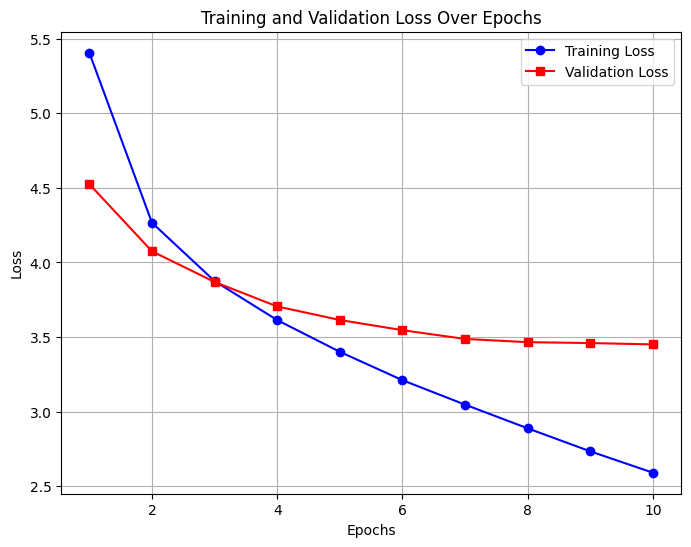

In [15]:
def plot_losses(train_losses, val_losses):
    """
    Plots the training and validation losses over epochs.

    Args:
        train_losses (list of floats): Training losses per epoch.
        val_losses (list of floats): Validation losses per epoch.
    """
    # Define epochs range based on the number of losses
    epochs = range(1, len(train_losses) + 1)

    # Print the losses for each epoch in a tabular format
    print("Epoch\tTrain Loss\tValidation Loss")
    for epoch in range(len(train_losses)):
        print(f"{epoch + 1}\t{train_losses[epoch]:.4f}\t\t{val_losses[epoch]:.4f}")

    # Plotting the losses
    plt.figure(figsize=(8, 6))  # Set the figure size
    # Plot the training losses
    plt.plot(epochs, train_losses, label="Training Loss", color='blue', marker='o')
    # Plot the validation losses
    plt.plot(epochs, val_losses, label="Validation Loss", color='red', marker='s')

    # Title and labels
    plt.title("Training and Validation Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()  # Show the legend
    plt.grid(True)  # Show grid for better visibility of the plot
    plt.show()  # Display the plot

plot_losses(train_losses, val_losses)

## **7.2 Visualizing Attention Weights**

Visualize the attention weigths in order to understand how your model learned.
For that, use the `context` variable returned by the **Attention class** to overlay them on the image.

```python
def plot_attention():
  raise NotImplementedError
```

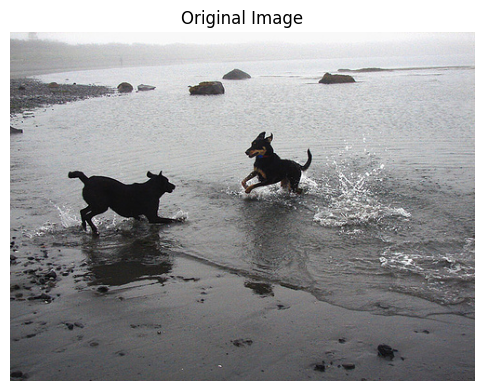

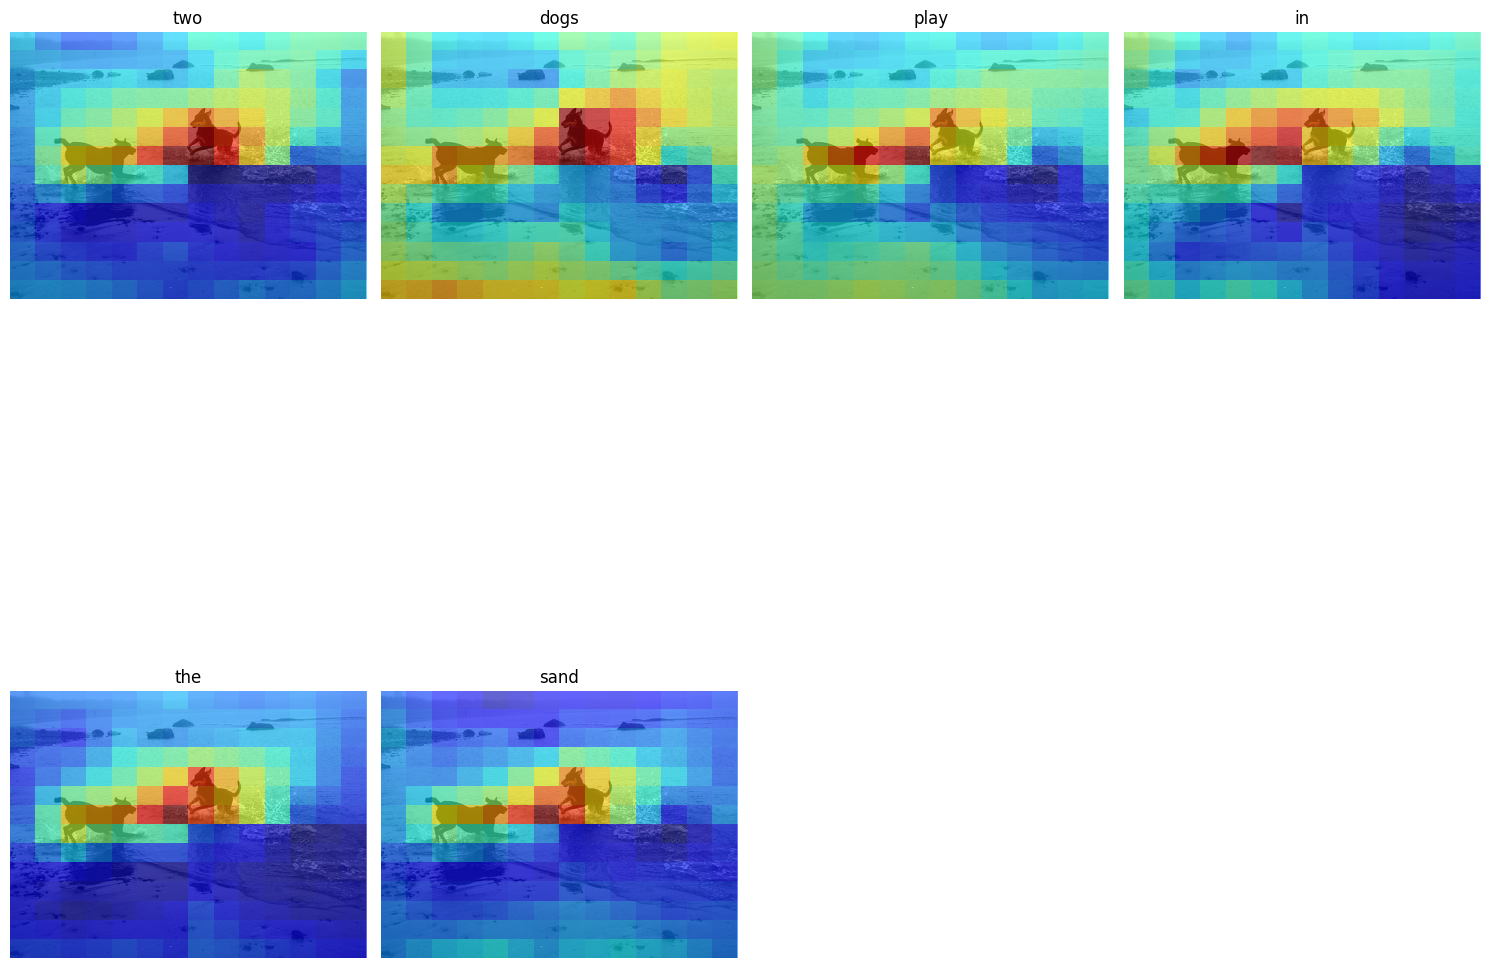

In [92]:
def visualize_attention(image_path, model, vocab, device, max_len=20):
    """
    Visualizes attention maps for each word in the caption.

    Args:
        image_path (str): Path to the image.
        model (nn.Module): The trained image captioning model.
        vocab (Vocabulary): Vocabulary object used for tokenizing and detokenizing.
        device (torch.device): The device to run the model on (CPU or GPU).
        max_len (int, optional): Maximum length of the caption. Default is 20.
    """
    # Set the model to evaluation mode
    model.eval()

    # Define the transformation to apply on the image before feeding it into the model
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Generate caption using greedy decoding
    encoder_out = model.encoder(img_tensor)  # Get the image features from the encoder
    caption = [vocab.stoi["<sos>"]]  # Start with the start token
    alphas_list = []  # List to store attention maps for each word

    # Decode word by word
    for _ in range(max_len):
        cap_tensor = torch.tensor(caption, dtype=torch.long).unsqueeze(0).to(device)
        outputs, alphas = model.decoder(encoder_out, cap_tensor)  # Get decoder outputs and attention
        next_word = outputs[0, -1].argmax().item()  # Get the word with the highest probability
        caption.append(next_word)
        alphas_list.append(alphas[0, -1].detach().cpu().numpy())  # Store the attention for this word
        if next_word == vocab.stoi["<eos>"]:  # End decoding if the EOS token is predicted
            break

    # Decode the caption into words
    words = [vocab.itos[idx] for idx in caption[1:-1] if idx != vocab.stoi["<eos>"]]
    alphas_list = alphas_list[:len(words)]  # Adjust attention maps to the number of words

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()

    # Plot attention maps for each word in the caption
    num_words = len(words)
    fig = plt.figure(figsize=(15, 15))
    for t in range(num_words):
        ax = fig.add_subplot(int(np.ceil(num_words / 4)), 4, t + 1)
        ax.set_title(words[t])

        # Reshape and normalize attention map to match the image dimensions
        alpha = alphas_list[t].reshape(14, 14)
        alpha = alpha / alpha.max()  # Normalize to [0, 1]

        # Display the attention map on top of the image
        ax.imshow(image)
        ax.imshow(alpha, alpha=0.6, extent=(0, image.width, image.height, 0), cmap='jet')
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# Pick a random image from the test dataset
idx = random.randint(0, len(test_dataset) - 1)  # Random index from the test dataset
image_tensor, _ = test_dataset[idx]  # Get image and caption (we don't need the caption here)
image_path = os.path.join(full_dataset.image_dir, full_dataset.image_paths[test_dataset.indices[idx]])

# Visualize the attention for the selected image
visualize_attention(image_path, model, full_dataset.vocab, device)

## **7.3 Running Inference on the Image Captioning Model**

Pass test images through the **custom-trained image captioning model**, then evaluate its performance on the test set. Use the **[BLEU score](https://pytorch.org/text/stable/data_metrics.html)** as the evaluation metric, implementing **BLEU-1, BLEU-2, BLEU-3, and BLEU-4**.

To improve performance on the validation and test sets, you may use **beam search decoding** instead of standard greedy decoding.  

[Beam Search](https://d2l.ai/chapter_recurrent-modern/beam-search.html) is a more sophisticated decoding algorithm that **considers multiple possible caption sequences at each time step instead of selecting the most probable word at every step (greedy decoding)**. It maintains a fixed number of candidate sequences (beam width) and expands them based on their cumulative probabilities, ultimately selecting the **most likely complete caption**.  

Using beam search can lead to **more fluent and accurate captions** by avoiding suboptimal word choices that greedy decoding might make.

```python
def test_model()
  raise NotImplementedError
```

In [71]:
def get_original_dataset_and_index(subset, index):
    """
    Recursively unwraps Subset layers to access the original dataset and true index.

    Args:
        subset (torch.utils.data.Subset): A subset of the dataset (could be wrapped in multiple Subsets).
        index (int): The index within the subset to access.

    Returns:
        tuple: The original dataset and the true index of the item in the dataset.
    """
    while isinstance(subset, torch.utils.data.Subset):
        index = subset.indices[index]  # Update the index as we unwrap the layers
        subset = subset.dataset  # Move to the next layer
    return subset, index  # Return the original dataset and the true index


def test_model(model, test_loader, vocab, device, max_len=20):
    """
    Evaluates the model on the test dataset and computes BLEU scores for the generated captions.

    Args:
        model (nn.Module): The trained model.
        test_loader (DataLoader): The DataLoader for the test dataset.
        vocab (Vocabulary): The vocabulary object used for tokenizing and detokenizing.
        device (torch.device): The device to run the model on (CPU or GPU).
        max_len (int, optional): The maximum length of generated captions. Default is 20.

    Returns:
        dict: The BLEU scores for 1, 2, 3, and 4 grams.
    """
    model.eval()  # Set the model to evaluation mode
    smoothie = SmoothingFunction().method4  # Use method4 for smoothing BLEU scores

    # Lists to store BLEU scores
    bleu1_scores, bleu2_scores, bleu3_scores, bleu4_scores = [], [], [], []

    # Iterate over the test dataset
    for images, _ in tqdm(test_loader):  # Loop through the test_loader
        images = images.to(device)  # Move images to the appropriate device

        # Iterate over each image in the batch
        for i in range(images.size(0)):
            image = images[i].unsqueeze(0)  # Get a single image
            encoder_out = model.encoder(image)  # Extract features using the encoder

            # Start with the SOS token for caption generation
            generated = [vocab.stoi["<sos>"]]  # Begin with the start token
            for _ in range(max_len):  # Generate words up to max_len
                cap_tensor = torch.tensor(generated, dtype=torch.long).unsqueeze(0).to(device)
                outputs, _ = model.decoder(encoder_out, cap_tensor)  # Get decoder outputs
                next_word = outputs[0, -1].argmax().item()  # Choose the word with the highest probability
                generated.append(next_word)  # Add the word to the generated caption
                if next_word == vocab.stoi["<eos>"]:  # Stop if EOS token is generated
                    break

            # Convert generated indices to words
            pred_caption = [vocab.itos[idx] for idx in generated[1:-1]]  # Remove <sos> and <eos>

            # Get the true reference caption
            base_dataset, original_idx = get_original_dataset_and_index(test_loader.dataset, i)
            reference_caption = base_dataset.captions[original_idx]  # Get true caption from dataset
            reference_tokens = vocab.tokenizer(reference_caption)  # Tokenize reference caption
            references = [reference_tokens]  # Create a list of references (for BLEU calculation)

            # Compute BLEU scores for the generated caption
            bleu1_scores.append(sentence_bleu(references, pred_caption, weights=(1, 0, 0, 0), smoothing_function=smoothie))
            bleu2_scores.append(sentence_bleu(references, pred_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie))
            bleu3_scores.append(sentence_bleu(references, pred_caption, weights=(1/3, 1/3, 1/3, 0), smoothing_function=smoothie))
            bleu4_scores.append(sentence_bleu(references, pred_caption, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie))

    # Calculate the average BLEU scores for all batches
    return {
        "BLEU-1": sum(bleu1_scores) / len(bleu1_scores),
        "BLEU-2": sum(bleu2_scores) / len(bleu2_scores),
        "BLEU-3": sum(bleu3_scores) / len(bleu3_scores),
        "BLEU-4": sum(bleu4_scores) / len(bleu4_scores),
    }


# Run the test and evaluate the model on the test dataset
scores_custom = test_model(model, test_loader, full_dataset.vocab, device)
print(scores_custom)  # Print the BLEU scores

100%|██████████| 19/19 [01:02<00:00,  3.30s/it]


{'BLEU-1': 0.18197319491220565,
 'BLEU-2': 0.08529558469083315,
 'BLEU-3': 0.04964020696680568,
 'BLEU-4': 0.032587139766128106}

## **8. Loading an Existing Image Captioning Model**

You are free to select any pre-trained image captioning model available. We recommend considering the following options:

1. **BLIP (Bootstrapping Language-Image Pre-training):** BLIP is a versatile vision-language pre-training framework that excels in both understanding and generation tasks. It effectively utilizes noisy web data by generating and filtering synthetic captions, achieving SOTA results in image captioning. Pre-trained models and code are available on [GitHub](https://github.com/salesforce/BLIP) and the [Hugging Face Model Hub](https://huggingface.co/Salesforce/blip-image-captioning-base).

2. **ViT-GPT2 Image Captioning Model:** This model combines a Vision Transformer (ViT) as the encoder and GPT-2 as the decoder, effectively connecting visual inputs with text generation. A fine-tuned version on the Flickr8k dataset is accessible on the [Hugging Face Model Hub](https://huggingface.co/NourFakih/image-captioning-Vit-GPT2-Flickr8k).

In [45]:
pip install transformers torchvision pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

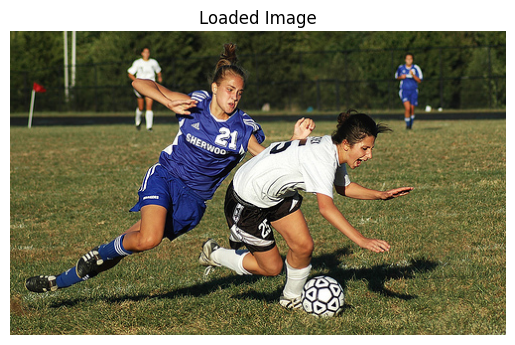

In [72]:
# Local image path
img_path = "/content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/47871819_db55ac4699.jpg"

# Try to open and display the image
try:
    # Open the image and convert to RGB
    image = Image.open(img_path).convert('RGB')

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title("Loaded Image")
    plt.show()
except Exception as e:
    # Handle errors (e.g., file not found, unsupported format)
    print(f"Error loading image: {e}")

In [73]:
# Load BLIP processor and model from pre-trained "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model_blip = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda" if torch.cuda.is_available() else "cpu")

# Load the local image from the specified path
img_path = "/content/drive/MyDrive/dnd-assignment/flickr8k_data/Images/47871819_db55ac4699.jpg"
image = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format

# Preprocess the image: convert it to the required tensor format for the BLIP model
inputs = processor(images=image, return_tensors="pt").to(model_blip.device)

# Generate the caption by passing the preprocessed image to the model
out = model_blip.generate(**inputs)

# Decode the generated output tokens into a human-readable caption
caption = processor.decode(out[0], skip_special_tokens=True)

# Print the generated caption
print("Caption:", caption)

Caption: two girls playing soccer


## **9. Evaluating the Existing Image Captioning Model**

For evaluation, apply the **same metrics** used in the assessment of your custom image captioning model to ensure a consistent and fair comparison.

In [74]:
def evaluate_blip_model(test_loader, vocab, processor, model_blip, device, max_images=None):
    """
    Evaluates the BLIP model using BLEU score on a given test dataset.

    Args:
        test_loader: DataLoader for the test dataset.
        vocab: Vocabulary used for tokenizing captions.
        processor: BLIP processor to preprocess images and generate captions.
        model_blip: The BLIP model for image captioning.
        device: The device (CPU/GPU) on which to run the model.
        max_images: Maximum number of images to evaluate (optional).

    Returns:
        A dictionary containing BLEU-1, BLEU-2, BLEU-3, and BLEU-4 scores.
    """

    # Initialize BLEU score lists and smoothing function
    smoothie = SmoothingFunction().method4
    bleu1_scores, bleu2_scores, bleu3_scores, bleu4_scores = [], [], [], []

    # Set model to evaluation mode
    model_blip.eval()

    # Track the number of evaluated images
    image_count = 0

    # Iterate over batches of images in the test loader
    for batch_idx, (images, _) in enumerate(tqdm(test_loader)):
        # Iterate over individual images in the batch
        for i in range(images.size(0)):
            if max_images and image_count >= max_images:  # Stop if the max number of images is reached
                break

            # Get the original dataset and index for this image
            base_dataset, original_idx = get_original_dataset_and_index(
                test_loader.dataset,
                batch_idx * test_loader.batch_size + i
            )
            image_path = os.path.join(base_dataset.image_dir, base_dataset.image_paths[original_idx])
            reference_caption = base_dataset.captions[original_idx]  # Get the reference caption

            # Load and preprocess the image
            image = Image.open(image_path).convert("RGB")
            inputs = processor(images=image, return_tensors="pt").to(device)

            # Generate prediction from the model
            output = model_blip.generate(**inputs)
            pred_caption = processor.decode(output[0], skip_special_tokens=True)

            # Tokenize reference and predicted captions
            pred_tokens = vocab.tokenizer(pred_caption)
            reference_tokens = vocab.tokenizer(reference_caption)
            references = [reference_tokens]

            # Compute BLEU scores (1-gram, 2-gram, 3-gram, 4-gram)
            bleu1_scores.append(sentence_bleu(references, pred_tokens, weights=(1, 0, 0, 0), smoothing_function=smoothie))
            bleu2_scores.append(sentence_bleu(references, pred_tokens, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie))
            bleu3_scores.append(sentence_bleu(references, pred_tokens, weights=(1/3, 1/3, 1/3, 0), smoothing_function=smoothie))
            bleu4_scores.append(sentence_bleu(references, pred_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie))

            # Increment the image count
            image_count += 1

    # Calculate average BLEU scores
    return {
        "BLEU-1": sum(bleu1_scores) / len(bleu1_scores),
        "BLEU-2": sum(bleu2_scores) / len(bleu2_scores),
        "BLEU-3": sum(bleu3_scores) / len(bleu3_scores),
        "BLEU-4": sum(bleu4_scores) / len(bleu4_scores),
    }

# Set the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Evaluate the BLIP model using the test_loader and processor
scores_blip = evaluate_blip_model(test_loader, full_dataset.vocab, processor, model_blip, device)

# Output the BLEU scores
scores_blip

100%|██████████| 19/19 [01:58<00:00,  6.22s/it]


{'BLEU-1': 0.23119508206058986,
 'BLEU-2': 0.1346846515675167,
 'BLEU-3': 0.08779900095702906,
 'BLEU-4': 0.0621654261042602}

## **10. Comparing the Two Models**

Compare the performance of both models using **BLEU-1, BLEU-2, BLEU-3, and BLEU-4** scores. Visualize predictions from both models on the **same batch of test images** to highlight their differences.

Analyze and justify the differences in performance, discussing factors such as model architecture, attention mechanisms, and training strategies. Finally, **propose possible improvements for your custom model**.

> **Answer**:
The blip_model outperforms the custom model in all the BLEU scores, hence the blip model takes lead in the performance.
The possible improvements can be:
- Increasing the size of dataset (as currently, I am only using 15% of the dataset because of the recourse constraints.)
- Increasing the number of epochs of trainning
- Improving the data augmentations such as adding color jittering or random vertical flips.
- Adding regularization techniques like dropout to prevent the overfitting (as currently, the gap between the trainning and the validation loss suggests the possible overfitting of the model)
- Incorporating transformer-based backbone like Vision Transformer

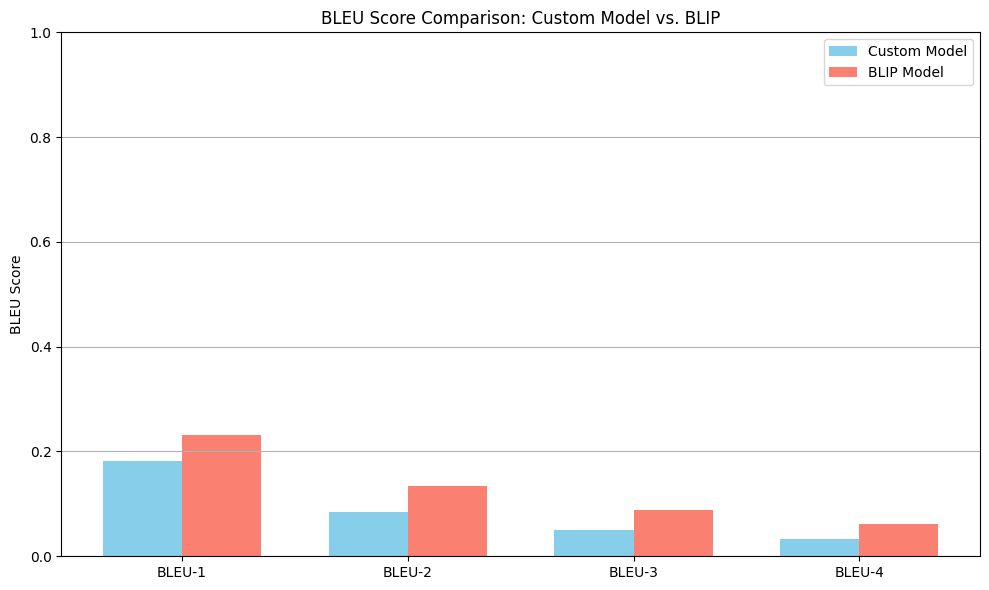

In [75]:
def plot_bleu_scores(scores_custom, scores_blip):
    """
    Plots a comparison of BLEU scores between the custom model and the BLIP model.

    Args:
        scores_custom (dict): BLEU scores (BLEU-1, BLEU-2, BLEU-3, BLEU-4) for the custom model.
        scores_blip (dict): BLEU scores (BLEU-1, BLEU-2, BLEU-3, BLEU-4) for the BLIP model.
    """
    # Extract labels (BLEU types) and corresponding scores for custom and BLIP models
    labels = list(scores_custom.keys())  # BLEU types (BLEU-1, BLEU-2, BLEU-3, BLEU-4)
    custom_vals = [scores_custom[key] for key in labels]  # Custom model's BLEU scores
    blip_vals = [scores_blip[key] for key in labels]  # BLIP model's BLEU scores

    # Position of the bars on the x-axis
    x = range(len(labels))  # Number of BLEU categories (4: BLEU-1, BLEU-2, BLEU-3, BLEU-4)
    width = 0.35  # Width of the bars

    # Create the plot
    plt.figure(figsize=(10, 6))  # Set figure size
    # Plot custom model scores
    plt.bar(x, custom_vals, width, label='Custom Model', color='skyblue')
    # Plot BLIP model scores (shifted by width)
    plt.bar([p + width for p in x], blip_vals, width, label='BLIP Model', color='salmon')

    # Labeling the plot
    plt.ylabel('BLEU Score')  # Y-axis label
    plt.title('BLEU Score Comparison: Custom Model vs. BLIP')  # Title of the plot
    plt.xticks([p + width / 2 for p in x], labels)  # Position labels at the center of each pair of bars
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (as BLEU scores are between 0 and 1)
    plt.legend()  # Display legend
    plt.grid(axis='y')  # Show grid only on the y-axis for better readability
    plt.tight_layout()  # Adjust layout to ensure everything fits within the figure area

    # Display the plot
    plt.show()

# Plot the BLEU score comparison
plot_bleu_scores(scores_custom, scores_blip)

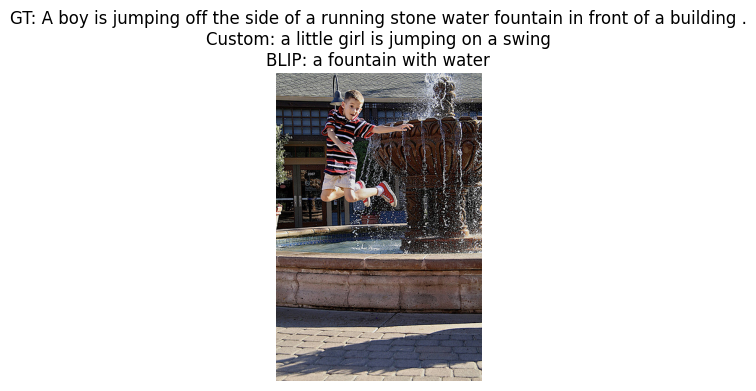

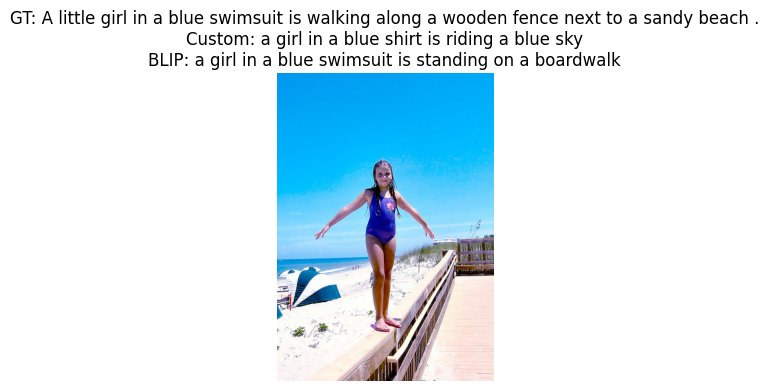

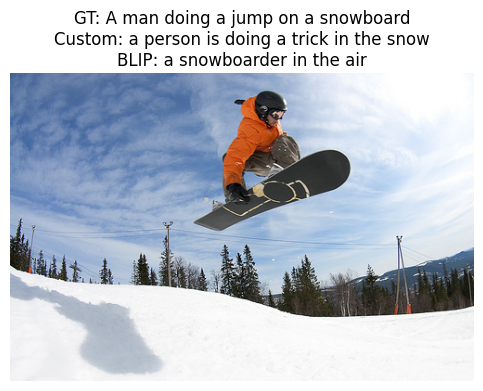

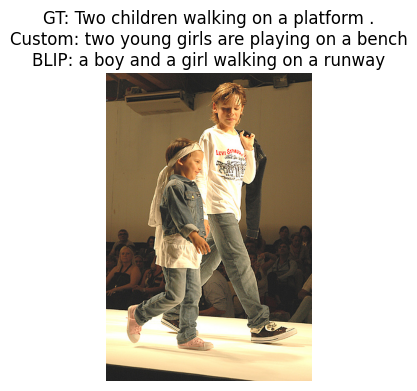

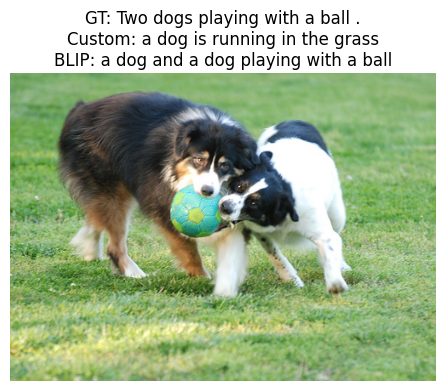

In [76]:
def visualize_predictions(custom_model, blip_model, processor, vocab, test_loader, device, num_images=5):
    """
    Visualizes predictions made by both the custom image captioning model and the BLIP model for a few test images.

    Args:
        custom_model (nn.Module): The custom image captioning model.
        blip_model (BlipForConditionalGeneration): The BLIP model.
        processor (BlipProcessor): Processor used for the BLIP model.
        vocab (Vocabulary): The vocabulary used by the custom model.
        test_loader (DataLoader): The test data loader.
        device (torch.device): The device to run the models on (CPU or GPU).
        num_images (int, optional): The number of images to visualize. Defaults to 5.
    """
    # Set both models to evaluation mode
    custom_model.eval()
    blip_model.eval()

    # Counter to keep track of how many images have been shown
    images_shown = 0

    # Iterate through the test dataset
    for batch_idx, (images, _) in enumerate(test_loader):
        images = images.to(device)

        # Process each image in the batch
        for i in range(images.size(0)):
            if images_shown >= num_images:
                return  # Stop after visualizing the specified number of images

            # Get image tensor and prepare for caption generation
            image_tensor = images[i].unsqueeze(0)

            # ---- Get the image path and reference caption ----
            # This function retrieves the original dataset and index for the image
            base_dataset, original_idx = get_original_dataset_and_index(
                test_loader.dataset, batch_idx * test_loader.batch_size + i)
            image_path = os.path.join(base_dataset.image_dir, base_dataset.image_paths[original_idx])
            reference_caption = base_dataset.captions[original_idx]

            # ---- Generate Custom Model Caption ----
            encoder_out = custom_model.encoder(image_tensor)
            generated = [vocab.stoi["<sos>"]]  # Start of sequence token

            # Generate caption by predicting the next word iteratively
            for _ in range(20):  # Maximum caption length
                cap_tensor = torch.tensor(generated).unsqueeze(0).to(device)
                outputs, _ = custom_model.decoder(encoder_out, cap_tensor)
                next_word = outputs[0, -1].argmax().item()  # Predict next word
                generated.append(next_word)
                if next_word == vocab.stoi["<eos>"]:  # End of sequence token
                    break

            # Convert predicted word indices to actual words
            custom_caption = ' '.join([vocab.itos[idx] for idx in generated[1:-1]])

            # ---- Generate BLIP Caption ----
            img_pil = Image.open(image_path).convert("RGB")  # Open image with PIL
            inputs = processor(images=img_pil, return_tensors="pt").to(device)  # Preprocess image for BLIP
            out = blip_model.generate(**inputs)  # Generate caption using BLIP
            blip_caption = processor.decode(out[0], skip_special_tokens=True)  # Decode the generated caption

            # ---- Display Image and Captions ----
            plt.figure(figsize=(8, 4))  # Set the figure size
            plt.imshow(img_pil)  # Show the image
            plt.axis('off')  # Hide the axes for better viewing
            plt.title(f"GT: {reference_caption}\nCustom: {custom_caption}\nBLIP: {blip_caption}")  # Display captions
            plt.show()

            images_shown += 1  # Increment the counter after showing an image

# Call the function to visualize predictions for 5 images
visualize_predictions(model, model_blip, processor, full_dataset.vocab, test_loader, device, num_images=5)